# Decision Trees

In this lab you will learn the most important aspects of the decision tree learning method. 
Completing this lab and analyzing the code will give you a deeper understanding of these type of models.
In our experiments we will mostly use the package sklearn from which we import DecisionTreeClassifier.

## Problem Setting

First of all, we calculate by hand the impurity measure of splitting some data by some criteria $q$ which in our case is given by a threshold t. Remember, that information gain is calculated as follows: 
$$IG(q) = S_{0} - \sum_{i=1}^{k}\frac{N_{i}(q)}{N}S_{i}(q)$$
where $k$ is the number of groups after partition; $N$ is the total number of examples; $N_{i}(q)$ is the number of examples in the group $i$ and $S$ is the (Shannon) entropy function defined as:
$$S = - \sum_{i}^{}\hat{p}_{i}\log(\hat{p}_{i}),$$
where $\hat{p}_{i}$ is the empirical frequency that the randomly chosen object has label $i$.

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

## Entropy
<b>Exercise 1:</b>

Write a function that calculates the entropy defined as: $$S = - \sum_{i}^{}\hat{p}_{i}\log(\hat{p}_{i}).$$ <b>Hint:</b> The function input is a vector of labels and the function should return the entropy. (Use the logarithm with base 2. In principle, any base for the logarithm can be used. Changing the base will just change the unit of information. Computer scientists like to use the base 2. In this case information is measured in bits.)

In [17]:
def entropy(y):
    ### WRITE YOUR CODE HERE ###
    entropy = 0
    _, counts = np.unique(y, return_counts=True) # get the counts of each class
    total = len(y)
    
    for count in counts:
        # print(count)
        p = count / total
        entropy -= p * np.log2(p) # np.log2함수 이용 
        # print(entropy)
    return entropy 
    


Check if your solution is correct:

In [18]:
try:
    assert entropy(np.array([1,1,0,0])) == 1.
    assert entropy(np.array([0,0])) == 0.
    assert str(entropy(np.array([1,1,0,0,1,1])))[:8] == "0.918295"
    print("Testing successful.")
except:
    print("Tests failed.")

Testing successful.


## Information Gain

<b> Exercise 2:</b>
Write a function that calculates the information gain obtained by setting the threshold $t\in \mathbb{R}$ for data points $x \in \mathbb{R}^{d}$ with label $y\in \mathbb{N}^{d}$. <b>Hint:</b> The function input is a vector x of attribut values, a vector y of labels and a threshold. The function should return the information gain for that specific split.

<b>Example</b>: A split at threshold $t=2$ for data points $x = [2,4,3,1,5]$ and label $y=[1,0,0,0,0]$ would result in the lists 
* $x_{right} = [4,3,5]$, $y_{right} = [0,0,0]$ (for $x > t$) and
* $x_{left} = [2,1]$, $y_{left} = [1,0]$ (for $x <= t$).
* Computation of information gain: $\textbf{entropy}([1,0,0,0,0]) - ((0.4 * \textbf{entropy}([1,0]))+(0.6 * \textbf{entropy}([0,0,0])))$

In [19]:
def info_gain(x,y,t):
    ### WRITE YOUR CODE HERE ###
    # x: feature, y: target, t: threshold
    total = len(y)
    y_right = y[x > t]
    y_left = y[x <= t]
    pr = len(y_right)/total
    pl = len (y_left)/total
    
    H0 = entropy(y)
    H_left = pl * entropy(y_left)
    H_right = pr * entropy(y_right)
    
    return H0 - H_left - H_right
    

Check if your solution is correct:

In [20]:
try:
    assert str(info_gain(np.array([5,2,3,44,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),5))[:8] == "0.609986"
    assert str(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),1))[:8] == "0.108031"
    assert str(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),3))[:8] == "0.395815"
    assert str(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),5))[:8] == "1.0"
    assert str(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),6))[:8] == "0.609986"
    print("Testing successful.")
except:
    print("Tests failed.")

Testing successful.


<b> Exercise 3:</b>

* Create a 2-dimensional data set with the help of the function make_blobs from package sklearn.datasets (the two returned variables should be named 'X' and 'label'). The data set should contain 500 data points with 2 clusters (2 classes). The cluster centers should be located at (0,0) and (3,3).
* Visualize the data set. It should look like this:
<img src="./figures/dataset.png" width="600"/>

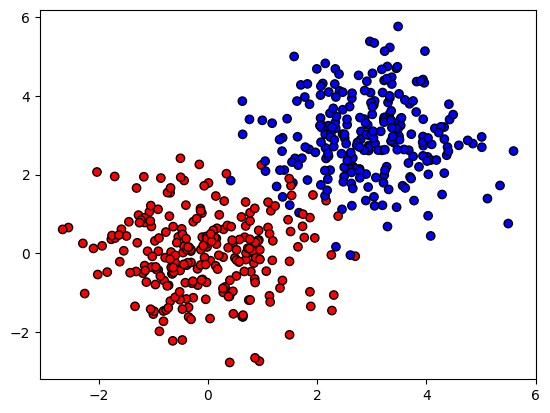

In [35]:
from sklearn.datasets import make_blobs
### WRITE YOUR CODE HERE ###
X, label = make_blobs(n_samples=500, centers = [(0,0),(3,3)], random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=['red' if label[i] == 0 else 'blue' for i in range(len(label))], edgecolors='black')
plt.show()

<b>Exercise 4:</b>

Write a function 'find_best_split(x,y)' that gets two input vectors $x \in \mathbb{R}^d$ and $y \in \{0,1\}^d$. This function should return the threshold $t \in x$ with the best split. <b>Hint:</b> Use the function 'info_gain' from exercise 2.

In [69]:
def find_best_split(x,y):
    ### WRITE YOUR CODE HERE ###
    current = 0
    best = 0
    
    for i in range(1, len(x)-1):
        t = (x[i] + x[i+1]) / 2 # use median value between two points as threshold -> spliting continuous data
        gain = info_gain(x, y, t)
        if current < gain:
            best = t
            current = gain
    print(best)
    # best = int(best) to pass the test, but without this line, it gives better result
    return best, current # return current as well for next task

Check if your solution is correct:

In [66]:
try:
    assert find_best_split(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0])) == 5
    assert find_best_split(np.array([1,2,2,4,5,6,7,8,9,10]),np.array([1,1,0,0,1,0,0,1,0,0])) == 8    
    print("Testing successful.")
except:
    print("Tests failed.") # it fails, but correct in next task

5.5
Tests failed.


<b>Exercise 5:</b>

* Find the best splitting for the two dimensions of the data set created in exercise 3. Plot the boundaries in a figure. Your figure should look like this:

<img src="./figures/split.png" width="600"/>

* Which split would you prefer, and why?

1.250368372326858
1.1488361467026986


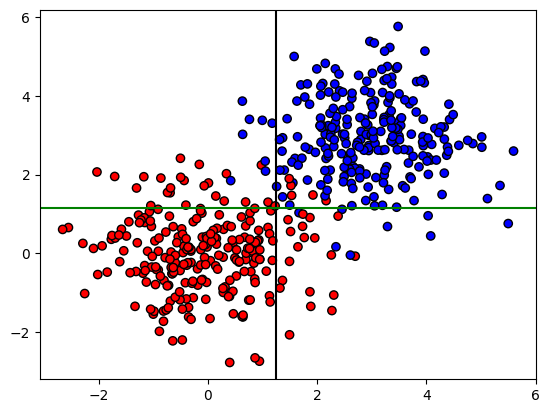

Information gain for x: 0.67
Information gain for y: 0.64
Best split is on x = 1.250368372326858


In [73]:
x_best, x_gain = find_best_split(X[:,0],label)
y_best, y_gain = find_best_split(X[:,1],label)
### WRITE YOUR CODE HERE ###
plt.scatter(X[:, 0], X[:, 1], c=['red' if label[i] == 0 else 'blue' for i in range(len(label))], edgecolors='black')

plt.axvline(x=x_best, color='black', linestyle='-')
plt.axhline(y=y_best, color='green', linestyle='-')

plt.show()

x_gain = round(x_gain, 2)
y_gain = round(y_gain, 2)

print(f"Information gain for x: {x_gain}")
print(f"Information gain for y: {y_gain}")
if x_gain > y_gain:
    print(f"Best split is on x = {x_best}")
else:
    print(f"Best split is on y = {y_best}")

## Train a Decision Tree
Now we train a decision tree using the sklearn package:

In [74]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=1) 
# 분류 기준으로 entropy 사용
# max_depth = 1로 설정하여, 트리의 최대 깊이를 1로 제한, overfitting 방지
clf_tree.fit(X, label) # 입력데이터 X와 레이블 label을 이용하여 모델 학습. fit()함수는 트리의 학습을 수행한다.


DecisionTreeClassifier(criterion='entropy', max_depth=1)

<b>Exercise 6:</b>
* Calculate the predictions for all instances from the training set (use the function predict). Which instances are misclassified? Create a plot that shows which instances are correctly classified and which instances are misclassified. This figure should look like this:

<img src="./figures/dec.png" width="600"/>

* Can you find learning parameters for the decision tree classifier (max_depth,min_samples_leaf,max_leaf_nodes,...) to get a classifier that classifies all instances correctly?

Number of misclassified samples: 32


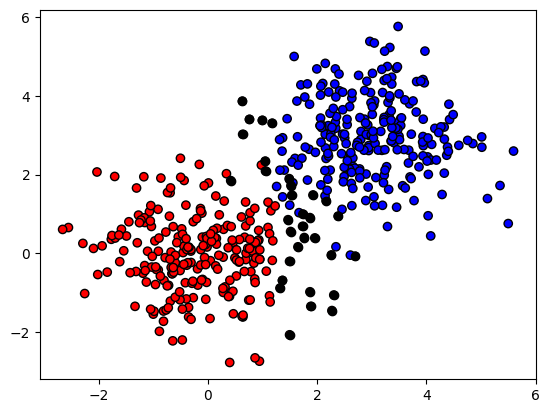

In [89]:
### WRITE YOUR CODE HERE ###
predicted = clf_tree.predict(X) # 학습된 모델을 이용하여 입력데이터 X에 대한 예측값을 계산
plt.scatter(X[:, 0], X[:, 1], c=['red' if label[i] == 0 else 'blue' for i in range(len(label))], edgecolors='black')

mis_count = 0
for i in range(len(predicted)):
    if predicted[i] != label[i]: # 둘이 비교하면서, 틀린거 있으면 검은색으로 표시
        plt.scatter(X[i, 0], X[i, 1], c='black', edgecolors='black')
        mis_count += 1
        
print(f"Number of misclassified samples: {mis_count}")

Number of misclassified samples: 0
The higher the depth, error rate decreases. But, it can cause overfitting.
/n
Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"bes

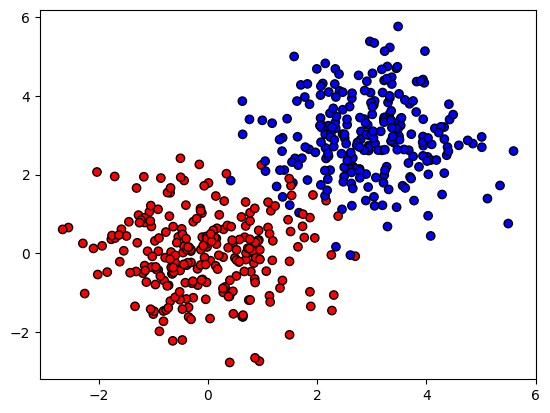

In [103]:
clf_tree_dep2 = DecisionTreeClassifier(criterion='entropy', max_depth=10) 
clf_tree_dep2.fit(X, label)
predicted = clf_tree_dep2.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=['red' if label[i] == 0 else 'blue' for i in range(len(label))], edgecolors='black')

mis_count = 0
for i in range(len(predicted)):
    if predicted[i] != label[i]: # 둘이 비교하면서, 틀린거 있으면 검은색으로 표시
        plt.scatter(X[i, 0], X[i, 1], c='black', edgecolors='black')
        mis_count += 1
        
print(f"Number of misclassified samples: {mis_count}")

print("The higher the depth, error rate decreases. But, it can cause overfitting.")

print("/n")

help(DecisionTreeClassifier)